# **Overview and Problem Statement**

This analysis uses data mining techniques to uncover patterns, make predictions, and provide actionable insights on the Superstore Dataset to identify sales, profit, and customer behavior trends across regions and product categories. By analyzing factors influencing profitability, the project aims to provide insights for optimizing promotions, customer targeting, and strategies, enhancing overall profitability and operational efficiency.

# **Dataset Selection**

Superstore Dataset was extracted from the following Kaggle link,
[Click Here To Direct Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data)

The Superstore dataset was chosen because it provides rich, real-world business data that aligns well with the assignment’s objectives of prediction, data analysis, and decision-making. The dataset covers sales, profit, discounts, and product categories, making it ideal for exploring profitability, sales trends, and discount strategies. The dataset allows us to explore the relationship between independent variables (e.g., sales, discount, category) and profit to guide business recommendations. The Superstore dataset offers a perfect blend of business relevance, regression-friendly features, and realistic challenges, making it a suitable choice for this assignment. It allows for meaningful insights and predictions that can guide strategic decision-making.

The dataset contains the following key features:

- **Row ID**: Unique ID for each row.
- **Order ID**: Unique Order ID for each customer.
- **Order Date**: Date the product was ordered.
- **Ship Date**: Date the product was shipped.
- **Ship Mode**: Shipping mode specified by the customer.
- **Customer ID**: Unique ID to identify each customer.
- **Customer Name**: Name of the customer.
- **Segment**: Segment to which the customer belongs.
- **Country**: Customer's country of residence.
- **City**: Customer's city of residence.
- **State**: Customer's state of residence.
- **Postal Code**: Customer's postal code.
- **Region**: Region where the customer belongs.
- **Product ID**: Unique ID of the product.
- **Category**: Product category.
- **Sub-Category**: Product sub-category.
- **Product Name**: Name of the product.
- **Sales**: Sales amount for the product.
- **Quantity**: Quantity of the product sold.
- **Discount**: Discount applied.
- **Profit**: Profit or loss incurred.

***Target Variable***

The target variable for this analysis is **Profit**, which represents the financial gain derived from sales after deducting costs such as discounts, shipping, and the cost of goods sold. 

***Importing Libraries***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1', index_col=[0])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


***Structure of Data***

In [3]:
df.shape

(9994, 20)

The dataset contains 99,994 rows and 20 features, making it suitable for uncovering meaningful patterns and trends. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

The dataset provides a real-world context in business and retail, making it highly relevant for understanding business dynamics, customer preferences, and product performance. It encompasses sales, profit, and customer information for a retail store, offering insights into various aspects of e-commerce.
The dataset includes categorical variables like Ship Mode, Product Category, and Region, along with continuous variables such as Sales and Profit, allowing for a rich analysis of customer behavior and product performance. With **Profit as the Target Variable**, this dataset is ideal for a **Regression** task aimed at predicting profitability based on historical sales data.

# **Data Preprocessing**

**Data Cleaning**

In [5]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# to ensures valid discount range
df['Discount'] = df['Discount'].clip(lower=0, upper=1) 

# to preserve leading zeros
df['Postal Code'] = df['Postal Code'].astype('str')

print(df.dtypes)

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


The dataset’s Order Date and Ship Date were converted to datetime format to facilitate feature extraction, while Postal Code was converted to a string to preserve leading zeros. Key continuous variables like Sales, Discount, and Profit were correctly formatted as floats, with Discount clipped between 0 and 1.

***Checking Erroneous Data***

In [7]:
def check_sales(df):
    if (df['Sales'] < 0).any():
        print("Warning: There are negative sales values.")
    if (df['Sales'] > 100000).any():  # Adjust this upper limit as necessary
        print("Warning: There are sales values above 100,000.")
    else:
        print("Sales values are all positive and within a reasonable range.")

def check_quantity(df):
    if (df['Quantity'] < 0).any():
        print("Warning: There are negative quantities.")
    if (df['Quantity'] % 1 != 0).any():  # Check for non-integers
        print("Warning: There are non-integer quantities.")
    else:
        print("All quantities are non-negative integers.")

def check_discount(df):
    if (df['Discount'] < 0).any():
        print("Warning: There are negative discounts.")
    if (df['Discount'] > 1).any():  # Adjust this check if discounts are percentages
        print("Warning: There are discounts greater than 1 (100%).")
    else:
        print("All discounts are between 0 and 1.")

def check_profit(df):
    negative_profit_conditions = (df['Profit'] < 0) & ((df['Sales'] * (1 - df['Discount'])) > 0)
    
    negative_profit_rows = df[negative_profit_conditions]
    number_of_negative_profit_rows = len(negative_profit_rows)

    if number_of_negative_profit_rows > 0:
        print(f"Warning: There are {number_of_negative_profit_rows} unexpected negative profit values.")
    else:
        print("Profit values are valid according to sales and discount values.")

check_sales(df)
check_quantity(df)
check_discount(df)
check_profit(df)

Sales values are all positive and within a reasonable range.
All quantities are non-negative integers.
All discounts are between 0 and 1.


Sales, Quantity, Discounts, and values are checked to see if there are any negative sales as it is an error and all values were found to be positive without errors.

However, there were 1871 negative profits found even after reducing discounts from sales, the reason could be warehouse and shipping cost since there are a large number of rows with negative profits.


In [8]:
print("Order ID:", df['Order ID'].nunique())
print("Order Date:", df['Order Date'].nunique())
print("Ship Date:", df['Ship Date'].nunique())
print("Ship Mode:", df['Ship Mode'].nunique())
print("Customer ID:", df['Customer ID'].nunique())
print("Customer Name:", df['Customer Name'].nunique())
print("Segment:", df['Segment'].nunique())
print("Country:", df['Country'].nunique())
print("City:", df['City'].nunique())
print("State:", df['State'].nunique())
print("Postal Code:", df['Postal Code'].nunique())
print("Region:", df['Region'].nunique())
print("Product ID:", df['Product ID'].nunique())
print("Category:", df['Category'].nunique())
print("Sub-Category:", df['Sub-Category'].nunique())
print("Product Name:", df['Product Name'].nunique())

Order ID: 5009
Order Date: 1237
Ship Date: 1334
Ship Mode: 4
Customer ID: 793
Customer Name: 793
Segment: 3
Country: 1
City: 531
State: 49
Postal Code: 631
Region: 4
Product ID: 1862
Category: 3
Sub-Category: 17
Product Name: 1850


In [9]:
print("Ship Mode:", df['Ship Mode'].unique())
print("Segment:", df['Segment'].unique())
print("Country:", df['Country'].unique())
print("Region:", df['Region'].unique())
print("Category:", df['Category'].unique())
print("Sub-Category:", df['Sub-Category'].unique())

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment: ['Consumer' 'Corporate' 'Home Office']
Country: ['United States']
Region: ['South' 'West' 'Central' 'East']
Category: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


Unique values for categorical features were checked to identify duplicate, inconsistent, or invalid labeling. However, no data quality issues were found but it was found that some features consisted of a wide variety of categories.

Based on the results we can see that from a superstore in United States, 5009 unique orders have been placed by 793 customers across 531 cities and 44 states grouped into 4 regions as South, West, Central and East.
There are 1862 Products categorized into Furniture, Office Supplies, and Technology categories with a breakdown of 17 sub-categories.

In [10]:
df = df.drop('Country', axis=1)

Dropped the column ‘Country’ as it contained a single unique value which is United States and would not add a value.

In [11]:
def check_ship_date(df):
    if (df['Ship Date'] < df['Order Date']).any():
        print("Warning: There are records where 'Ship Date' is before 'Order Date'.")
    else:
        print("All 'Ship Dates' are valid (after 'Order Date').")

check_ship_date(df)

All 'Ship Dates' are valid (after 'Order Date').


Shipping dates are checked if they are recorded erroneously by comparing with Order date and no such records were found.

In [12]:
def check_postal_code_using_dataset(df):
    postal_code_validation_df = df[['Postal Code', 'State', 'City']].drop_duplicates()

    grouped = postal_code_validation_df.groupby(['Postal Code', 'State'])['City'].apply(set).reset_index()

    invalid_postal_codes = grouped[grouped['City'].str.len() > 1]['Postal Code'].tolist() 
    if invalid_postal_codes:
        print("Warning: The following postal codes correspond to multiple cities:")
        for code in invalid_postal_codes:
            cities = grouped[grouped['Postal Code'] == code]['City'].values[0]
            print(f"Postal Code: {code} - Cities: {cities}")
    else:
        print("All postal codes correspond to a single city per state.")

    return invalid_postal_codes

invalid_postal_codes = check_postal_code_using_dataset(df)

Postal Code: 92024 - Cities: {'Encinitas', 'San Diego'}


In [13]:
def remove_invalid_postal_codes(df, invalid_postal_codes):
    original_shape = df.shape  
    df.drop(df[df['Postal Code'].isin(invalid_postal_codes)].index, inplace=True)
    
    print("Rows with invalid postal codes have been removed.")
    print(f"Original shape: {original_shape} -> New shape: {df.shape}")

remove_invalid_postal_codes(df, invalid_postal_codes)

Rows with invalid postal codes have been removed.
Original shape: (9994, 19) -> New shape: (9955, 19)


Removed entries where postal codes corresponded to multiple cities. One such postal code was found and removed.

Checked if there is any missing values in the dataset and there was none found.

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

Next, checked if there is any duplicated rows and 1 row was found and deleted.

In [16]:
df.shape

(9954, 19)

***Checking Missing Values***

In [17]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


No missing values were found during the analysis

***Checking Outliers***

In [18]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

sales_outliers = find_outliers_iqr(df, 'Sales')
profit_outliers = find_outliers_iqr(df, 'Profit')
discount_outliers = find_outliers_iqr(df, 'Discount')
quantity_outliers = find_outliers_iqr(df, 'Quantity')

print("Sales Outliers:", len(sales_outliers))
print("Profit Outliers:", len(profit_outliers))
print("Discount Outliers:", len(discount_outliers))
print("Quantity Outliers:", len(quantity_outliers))

Sales Outliers: 1163
Profit Outliers: 1876
Discount Outliers: 856
Quantity Outliers: 169


The dataset contains 1163 outliers in sales, 1876 in profit, 856 in discounts, and 169 in quantity, indicating significant anomalies in these areas that could impact analysis.

Quantity Outliers: 169


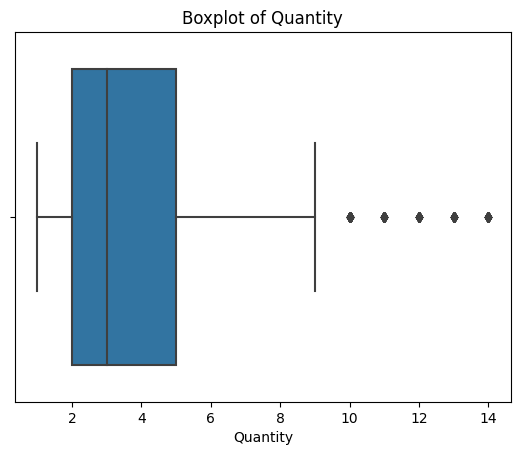

In [19]:
quantity_outliers = find_outliers_iqr(df, 'Quantity')
print("Quantity Outliers:", len(quantity_outliers))

sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

In [20]:
print(quantity_outliers.describe())

                          Order Date                      Ship Date   
count                            169                            169  \
mean   2016-03-15 22:09:13.846153728  2016-03-19 22:00:42.603550208   
min              2014-01-19 00:00:00            2014-01-20 00:00:00   
25%              2014-12-23 00:00:00            2014-12-28 00:00:00   
50%              2016-01-23 00:00:00            2016-01-27 00:00:00   
75%              2017-05-20 00:00:00            2017-05-22 00:00:00   
max              2017-12-25 00:00:00            2017-12-30 00:00:00   
std                              NaN                            NaN   

             Sales    Quantity    Discount       Profit  
count   169.000000  169.000000  169.000000   169.000000  
mean    592.323911   11.615385    0.149231    98.063662  
min       3.960000   10.000000    0.000000 -1862.312400  
25%      63.470000   10.000000    0.000000    12.776400  
50%     192.720000   11.000000    0.100000    33.831000  
75%     563.

In [21]:
quantity_cap = df['Quantity'].quantile(0.95)
df['Quantity'] = np.where(df['Quantity'] > quantity_cap, quantity_cap, df['Quantity'])

After analyzing the Quantity column, I found that the identified outliers are not extreme or erroneous as the minimum of outliers is 10 and the maximum is 14. While the identified Quantity outliers were not extreme, I applied capping at the 95th percentile to ensure model stability. This method preserves most data while reducing the impact of slightly larger values on predictive models.

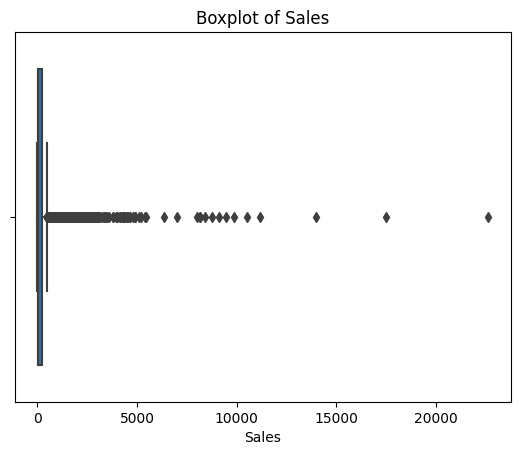

In [22]:
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.show()

In [23]:
print(sales_outliers.describe())

                          Order Date                      Ship Date   
count                           1163                           1163  \
mean   2016-04-11 02:36:00.619088640  2016-04-14 23:56:17.128116992   
min              2014-01-06 00:00:00            2014-01-10 00:00:00   
25%              2015-04-16 00:00:00            2015-04-18 12:00:00   
50%              2016-05-22 00:00:00            2016-05-27 00:00:00   
75%              2017-05-03 12:00:00            2017-05-07 00:00:00   
max              2017-12-29 00:00:00            2018-01-02 00:00:00   
std                              NaN                            NaN   

              Sales     Quantity     Discount       Profit  
count   1163.000000  1163.000000  1163.000000  1163.000000  
mean    1267.162990     5.163371     0.145400   160.735275  
min      499.168000     1.000000     0.000000 -6599.978000  
25%      631.960000     3.000000     0.000000    10.075550  
50%      866.400000     5.000000     0.200000   119.686

The sales outlier values range from 499.17 to 22,638.48, indicating the presence of several high-value transactions that are significant outliers compared to the average outlier sales amount (mean of 1266.05). A standard deviation of 1419.11 relative to the mean suggests that there is a lot of variability in sales outlier amounts. 

In [24]:
sales_cap = df['Sales'].quantile(0.95)
df['Sales'] = np.where(df['Sales'] > sales_cap, sales_cap, df['Sales'])

Given the wide range of sales outlier values, I capped sales at the 95th percentile to prevent extreme values from skewing the analysis. This helps to stabilize predictive models while retaining valid sales data.

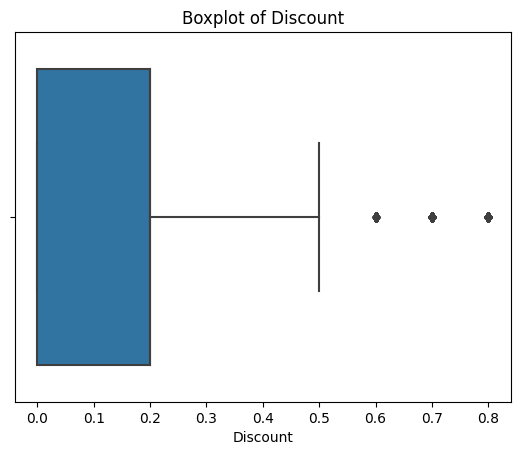

In [25]:
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount')
plt.show()

In [26]:
print(discount_outliers.describe())

                          Order Date                      Ship Date   
count                            856                            856  \
mean   2016-04-29 13:07:17.383177472  2016-05-03 13:22:25.794392320   
min              2014-01-04 00:00:00            2014-01-08 00:00:00   
25%              2015-06-08 00:00:00            2015-06-12 00:00:00   
50%              2016-06-12 00:00:00            2016-06-17 00:00:00   
75%              2017-04-30 00:00:00            2017-05-04 06:00:00   
max              2017-12-28 00:00:00            2018-01-01 00:00:00   
std                              NaN                            NaN   

             Sales    Quantity    Discount       Profit  
count   856.000000  856.000000  856.000000   856.000000  
mean     75.033572    3.912383    0.718925   -89.438144  
min       0.444000    1.000000    0.600000 -6599.978000  
25%       4.916250    2.000000    0.700000   -35.169600  
50%      12.005000    3.000000    0.700000   -11.656700  
75%      34.

The average discount outlier of 72% is significantly high, indicating that many transactions may involve substantial price reductions. Discounts outliers range from 60% to 80%, with no values below 60%. This indicates a consistent promotional strategy or clearance sales rather than erroneous data. The mean profit is -89.44, which is concerning and suggests that the high discounts may be leading to losses on many transactions. This is further supported by the maximum profit being -0.59.


In [27]:
df['Discount'] = np.where(df['Discount'] > 0.80, 0.80, df['Discount'])

Upon review, we found that the high discounts represent legitimate promotional strategies aimed at clearing inventory. To prevent excessively high discounts from skewing profit analysis, I capped the discount values at 80%, retaining the majority of the data while reducing the impact of extreme values. The approach aligns with business logic and preserves the integrity of the data.

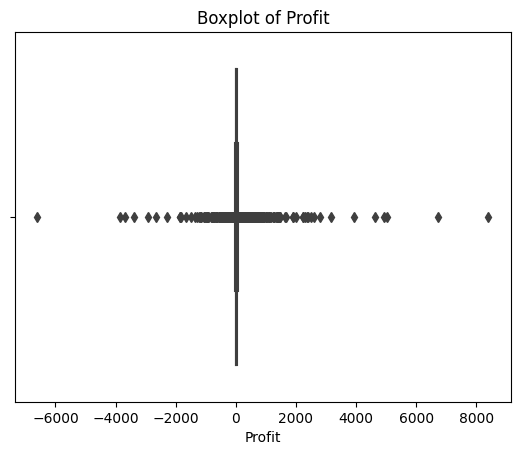

In [28]:
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

In [29]:
print(profit_outliers.describe())

                          Order Date                      Ship Date   
count                           1876                           1876  \
mean   2016-04-26 05:37:44.392324352  2016-04-30 03:34:09.466950912   
min              2014-01-04 00:00:00            2014-01-08 00:00:00   
25%              2015-05-07 00:00:00            2015-05-09 12:00:00   
50%              2016-06-06 00:00:00            2016-06-11 00:00:00   
75%              2017-05-13 00:00:00            2017-05-17 00:00:00   
max              2017-12-29 00:00:00            2018-01-04 00:00:00   
std                              NaN                            NaN   

              Sales     Quantity     Discount       Profit  
count   1876.000000  1876.000000  1876.000000  1876.000000  
mean     829.006130     4.819296     0.187900   102.034920  
min       18.320000     1.000000     0.000000 -6599.978000  
25%      275.818500     3.000000     0.000000   -58.537275  
50%      489.483000     4.000000     0.100000    93.698

The profits range from a minimum of -6599.98 (indicating losses) to a maximum of 8399.98. This suggests significant variability in profit margins across transactions.

In [30]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Profit'] = np.where(df['Profit'] < lower_bound, lower_bound, df['Profit'])
df['Profit'] = np.where(df['Profit'] > upper_bound, upper_bound, df['Profit'])

To mitigate the influence of extreme profit values, profits were capped. This adjustment ensures the overall analysis remains representative of typical business operations. This approach prevents extreme values from skewing our analysis while retaining the majority of the profit data. This method is appropriate for handling profit variability.

Outliers in Quantity, Sales, Discounts, and Profit were capped to ensure stable model performance. Quantity and Sales were capped at the 95th percentile to retain meaningful data, while discounts were limited to 80% to reflect business strategies. IQR-based capping was applied to profit to manage extreme variability

**Feature Engineering**

A new feature called Order Duration is created which is the difference between Order Date and the Ship Date. Another feature called Profit Margin is created which is the profit as a fraction of sales.

In [31]:
df['Order Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [32]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

Then, out of the Order Date and Ship Date, the Order Year, Order Month, Order Day, Ship Year, Ship Month and Ship Day is extracted to recognize seasonal trends in sales and profitability. Then cyclical encoding is done for Order Month, Order Day, Ship Month, and Ship Day using sine and cosine transformation to avoid ordinal issues. And then, dropped the additional features to reduce redundancy in the dataset to prevent multicollinearity issues.

In [33]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day

df['Order Day of Week'] = df['Order Date'].dt.dayofweek

# cyclical encoding for month and day
def cyclical_encoding(df, col, max_val):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

df = cyclical_encoding(df, 'Order Month', 12)
df = cyclical_encoding(df, 'Order Day', 31)
df = cyclical_encoding(df, 'Ship Month', 12)
df = cyclical_encoding(df, 'Ship Day', 31)

df = df.drop(['Order Date', 'Ship Date', 'Order Month', 'Order Day', 'Ship Month', 'Ship Day'], axis=1)

Additionally, the Is Weekend Order feature was created to indicate if an order occurred on a weekend.

In [34]:
df['Is Weekend Order'] = df['Order Day of Week'] >= 5 

‘Total Price After Discount’ is feature is created after reducing discount from sales value.

In [35]:
df['Total Price After Discount'] = df['Sales'] * (1 - df['Discount'])

In [36]:
features_to_drop = ['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code', 'Ship Year', 'City']
df = df.drop(columns=features_to_drop)

Order ID and Customer ID are unique identifiers and typically don't contribute to predictive power. Customer Name is likely redundant with Customer ID and may introduce noise. Postal Code might be too granular and could lead to overfitting dropping, especially if keeping City and State. Product ID and Product Name might be too specific dropping if keeping Category and Sub-Category. Depending on data size and the number of unique cities/states, I choose to keep only State to avoid overfitting.


In [37]:
df

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,...,Order Month_sin,Order Month_cos,Order Day_sin,Order Day_cos,Ship Month_sin,Ship Month_cos,Ship Day_sin,Ship Day_cos,Is Weekend Order,Total Price After Discount
Row ID,,,,,,,,,,,,,,,,,,,,,
1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960000,2.0,0.00,41.9136,...,-5.000000e-01,0.866025,0.998717,-0.050649,-5.000000e-01,8.660254e-01,0.790776,-0.612106,False,261.960000
2,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.940000,3.0,0.00,70.7973,...,-5.000000e-01,0.866025,0.998717,-0.050649,-5.000000e-01,8.660254e-01,0.790776,-0.612106,False,731.940000
3,Second Class,Corporate,California,West,Office Supplies,Labels,14.620000,2.0,0.00,6.8714,...,1.224647e-16,-1.000000,0.651372,-0.758758,1.224647e-16,-1.000000e+00,-0.101168,-0.994869,True,14.620000
4,Standard Class,Consumer,Florida,South,Furniture,Tables,956.984245,5.0,0.45,-39.7187,...,-8.660254e-01,0.500000,0.790776,-0.612106,-8.660254e-01,5.000000e-01,-0.485302,-0.874347,True,526.341335
5,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368000,2.0,0.20,2.5164,...,-8.660254e-01,0.500000,0.790776,-0.612106,-8.660254e-01,5.000000e-01,-0.485302,-0.874347,True,17.894400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.248000,3.0,0.20,4.1028,...,5.000000e-01,0.866025,-0.897805,-0.440394,5.000000e-01,8.660254e-01,-0.998717,-0.050649,False,20.198400
9991,Standard Class,Consumer,California,West,Furniture,Furnishings,91.960000,2.0,0.00,15.6332,...,8.660254e-01,0.500000,-0.848644,0.528964,1.000000e+00,6.123234e-17,0.571268,0.820763,True,91.960000
9992,Standard Class,Consumer,California,West,Technology,Phones,258.576000,2.0,0.20,19.3932,...,8.660254e-01,0.500000,-0.848644,0.528964,1.000000e+00,6.123234e-17,0.571268,0.820763,True,206.860800


Continuous variables like Sales and Quantity were scaled using StandardScaler

In [38]:
continuous_cols = ['Sales', 'Quantity', 'Order Duration', 'Discount', 'Profit Margin', 'Total Price After Discount']

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [39]:
print(df.dtypes)

Ship Mode                      object
Segment                        object
State                          object
Region                         object
Category                       object
Sub-Category                   object
Sales                         float64
Quantity                      float64
Discount                      float64
Profit                        float64
Order Duration                float64
Profit Margin                 float64
Order Year                      int32
Order Day of Week               int32
Order Month_sin               float64
Order Month_cos               float64
Order Day_sin                 float64
Order Day_cos                 float64
Ship Month_sin                float64
Ship Month_cos                float64
Ship Day_sin                  float64
Ship Day_cos                  float64
Is Weekend Order                 bool
Total Price After Discount    float64
dtype: object


In [40]:
le = LabelEncoder()
df['Is Weekend Order'] = le.fit_transform(df['Is Weekend Order'])

In [41]:
nominal_features = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']

df = pd.get_dummies(df, columns=nominal_features)

In [42]:
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)

In [43]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 1 to 9994
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sales                       9954 non-null   float64
 1   Quantity                    9954 non-null   float64
 2   Discount                    9954 non-null   float64
 3   Profit                      9954 non-null   float64
 4   Order Duration              9954 non-null   float64
 5   Profit Margin               9954 non-null   float64
 6   Order Year                  9954 non-null   int32  
 7   Order Day of Week           9954 non-null   int32  
 8   Order Month_sin             9954 non-null   float64
 9   Order Month_cos             9954 non-null   float64
 10  Order Day_sin               9954 non-null   float64
 11  Order Day_cos               9954 non-null   float64
 12  Ship Month_sin              9954 non-null   float64
 13  Ship Month_cos              9954 non-n

The dataset was split into 70% training and 30% testing sets using train_test_split() to ensure unbiased model evaluation.

**Data Splitting**

In [44]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f'Training set length: {len(train_set)}')
print(f'Test set length: {len(test_set)}')

Training set length: 7963
Test set length: 1991


The dataset was split into 70% training and 30% testing sets using train_test_split() to ensure unbiased model evaluation.

# **Exploratory Data Analysis**

***Descriptive Statistics***

In [45]:
key_variables = ['Sales', 'Quantity', 'Discount', 'Profit', 'Order Duration', 'Profit Margin']

summary_stats = df[key_variables].describe()
print("Descriptive Statistics for Key Variables:\n", summary_stats)

Descriptive Statistics for Key Variables:
               Sales      Quantity      Discount       Profit  Order Duration   
count  9.954000e+03  9.954000e+03  9.954000e+03  9954.000000    9.954000e+03  \
mean  -9.993569e-18  6.281672e-17  7.138263e-17    16.033181    1.427653e-18   
std    1.000050e+00  1.000050e+00  1.000050e+00    29.491191    1.000050e+00   
min   -6.791419e-01 -1.365391e+00 -7.566784e-01   -39.718700   -2.264245e+00   
25%   -6.139496e-01 -8.603334e-01 -7.566784e-01     1.724800   -5.476956e-01   
50%   -4.698777e-01 -3.552757e-01  2.107954e-01     8.636000    2.448765e-02   
75%    1.335259e-01  6.548398e-01  2.107954e-01    29.353800    5.966709e-01   
max    3.031826e+00  2.170013e+00  3.113217e+00    70.797300    1.741037e+00   

       Profit Margin  
count   9.954000e+03  
mean    5.425080e-17  
std     1.000050e+00  
min    -7.117768e+00  
25%    -1.322259e-01  
50%     2.926358e-01  
75%     5.505525e-01  
max     9.216003e-01  


The descriptive statistics summary for key variables provides a comprehensive view of the dataset. For instance, the Sales variable has 9,954 observations, with a mean close to zero (-9.99e-18), and a standard deviation of 1.00, indicating how spread out the values are. The minimum sales value is -0.679, while the maximum reaches 3.03. The Profit variable, with a mean of 16.03 and a median of 8.64, ranges from -39.72 to 70.80, showing notable variability (standard deviation of 29.49). Similarly, other variables like Quantity and Discount also have standard deviations of 1.00, with their respective minimum, median, and maximum values giving insights into their distributions. 

In [46]:
print("Mean Profit:", df['Profit'].mean())
print("Median Profit:", df['Profit'].median())
print("Profit Variance:", df['Profit'].var())
print("Profit Standard Deviation:", df['Profit'].std())
print("Sales to Profit Correlation:\n", df[['Sales', 'Profit']].corr())

Mean Profit: 16.033181484830223
Median Profit: 8.636
Profit Variance: 869.7303293671032
Profit Standard Deviation: 29.49119070785551
Sales to Profit Correlation:
            Sales    Profit
Sales   1.000000  0.433609
Profit  0.433609  1.000000


The analysis shows the mean profit at 16.03 and a median profit of 8.636, with a variance of 869.73. There’s a positive correlation of 0.43 between sales and profit, suggesting that higher sales are generally associated with higher profits but not strongly.

***Correlation Insights***

Correlation Matrix:
                    Sales  Quantity  Discount    Profit  Order Duration   
Sales           1.000000  0.280450 -0.048994  0.433609       -0.016254  \
Quantity        0.280450  1.000000  0.011694  0.192024        0.018193   
Discount       -0.048994  0.011694  1.000000 -0.498118        0.000408   
Profit          0.433609  0.192024 -0.498118  1.000000       -0.012533   
Order Duration -0.016254  0.018193  0.000408 -0.012533        1.000000   
Profit Margin  -0.060760 -0.009148 -0.825700  0.349837       -0.010430   

                Profit Margin  
Sales               -0.060760  
Quantity            -0.009148  
Discount            -0.825700  
Profit               0.349837  
Order Duration      -0.010430  
Profit Margin        1.000000  


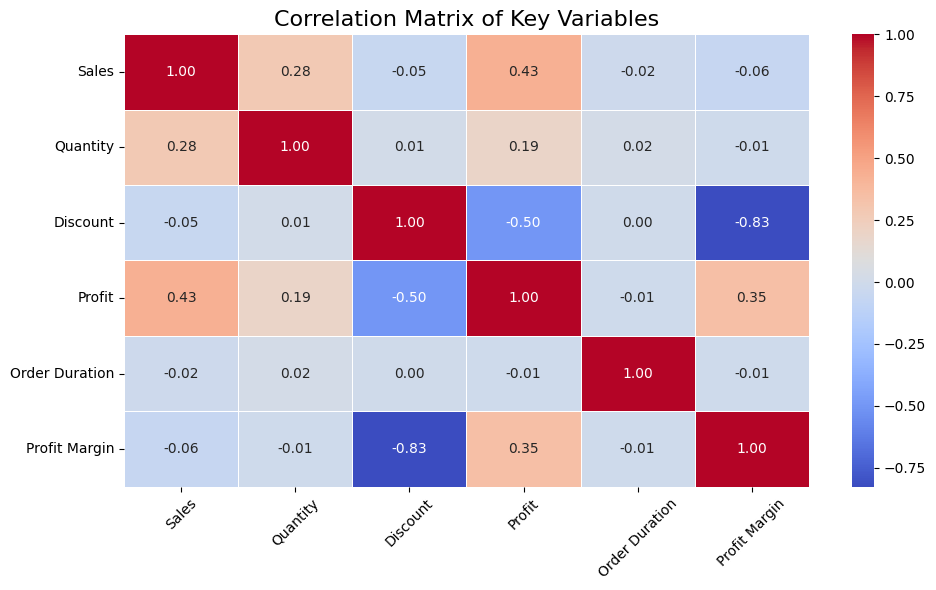

In [47]:
# Calculate the correlation matrix
correlation_matrix = df[key_variables].corr()

print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.xticks(rotation=45) 
plt.yticks(rotation=0)    
plt.tight_layout()  
plt.show()

This correlation matrix shows the relationships between variables like Sales, Quantity, Discount, Profit, Order Duration, and Profit Margin.

For instance, the correlation between Sales and Profit is 0.433609, indicating a moderate positive relationship—when sales go up, profit generally increases. Meanwhile, Sales and Discount have a slight negative correlation of -0.048994, meaning higher discounts slightly correlate with lower sales. Discount and Profit show a stronger negative correlation of -0.498118, suggesting that higher discounts tend to decrease profit. Lastly, Profit Margin and Discount have a very negative correlation of -0.825700, indicating that higher discounts significantly reduce the profit margin. These values help in understanding how different variables move in relation to each other.

***Visualization Insights***

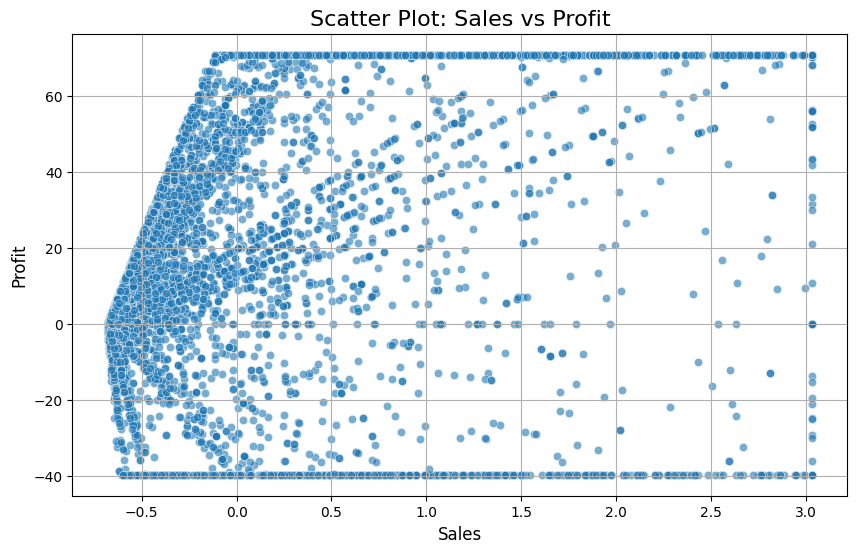

In [48]:
# Scatter Plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.6)
plt.title('Scatter Plot: Sales vs Profit', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between sales and profit for the dataset. There is a noticeable clustering of points, particularly in the lower sales range, indicating a higher density of data in that area. As sales increase, profit tends to increase as well, but there are many instances of low or negative profit even at higher sales levels. The overall trend suggests a positive correlation between sales and profit, but with significant variability, particularly at lower sales levels.

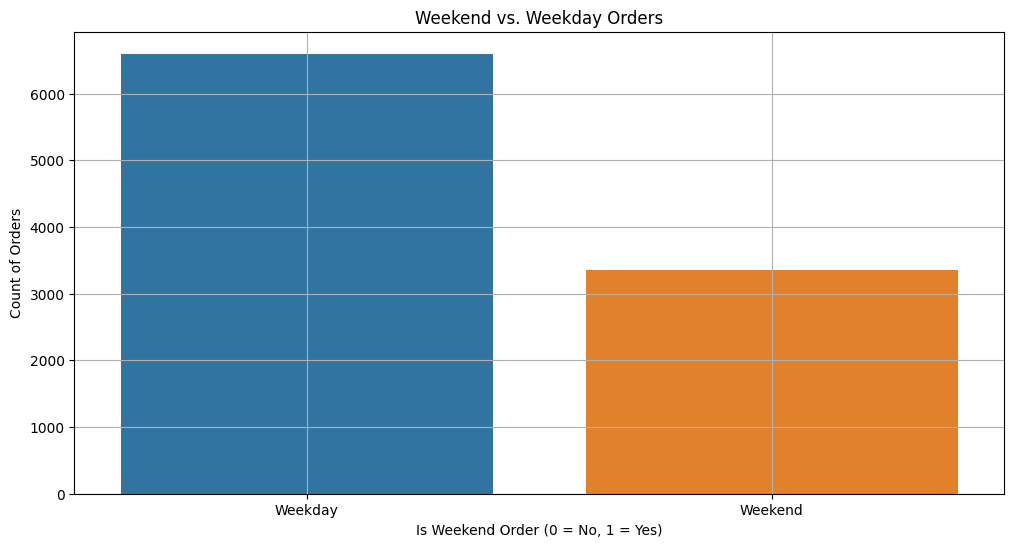

In [49]:
# Bar Chart of Weekend vs. Weekday Orders:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Is Weekend Order')
plt.title('Weekend vs. Weekday Orders')
plt.xlabel('Is Weekend Order (0 = No, 1 = Yes)')
plt.ylabel('Count of Orders')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.grid()
plt.show()


The bar chart titled "Weekend vs. Weekday Orders" clearly illustrates a significant trend, there are around double the number of orders placed on weekdays compared to weekends, with weekday orders surpassing 6,000 while weekend orders just exceed 3,000. This suggests that customers are far more active during the weekdays. The disparity, highlighted by the taller blue bar for weekdays and the shorter orange bar for weekends, implies a clear preference for weekday shopping or ordering, possibly due to routine activities or work-related engagements that drive weekday commerce.

C:\Users\DELL\AppData\Local\Temp\ipykernel_22224\3018880165.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order Day of Week', y='Profit', ci=None)


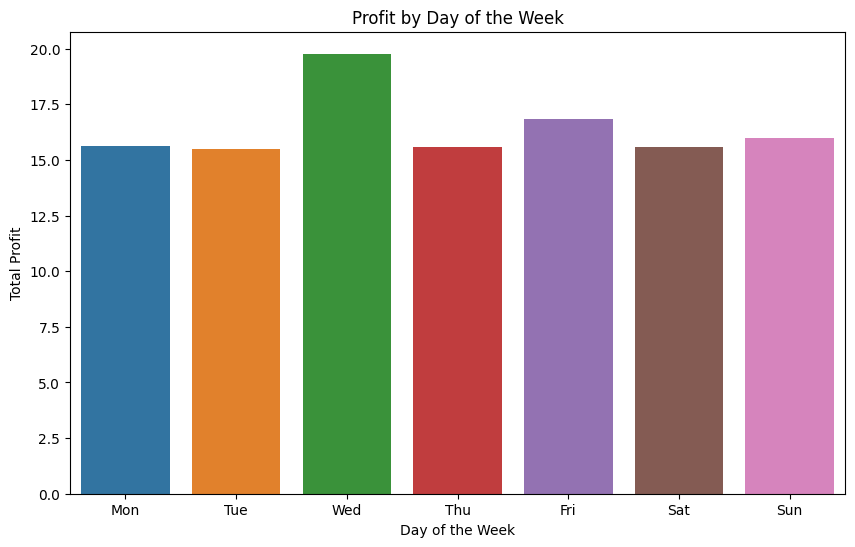

In [50]:
# Bar Chart for Profit by Day of the Week:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Order Day of Week', y='Profit', ci=None)
plt.title('Profit by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


The bar chart titled "Profit by Day of the Week" reveals some interesting patterns in total profit across the week. Wednesday stands out as the peak day for profit, reaching nearly 20 units, significantly higher than other days. Friday also shows strong performance, with profits around 16 units. The remaining days, including Monday, Tuesday, Thursday, Saturday, and Sunday, all exhibit similar profit figures, each slightly above 15 units. This uniform distribution across most of the week, except for Wednesday's peak and Friday's slightly lower figures, suggests a consistent level of customer activity. This might indicate stable sales throughout the week with a notable midweek surge.

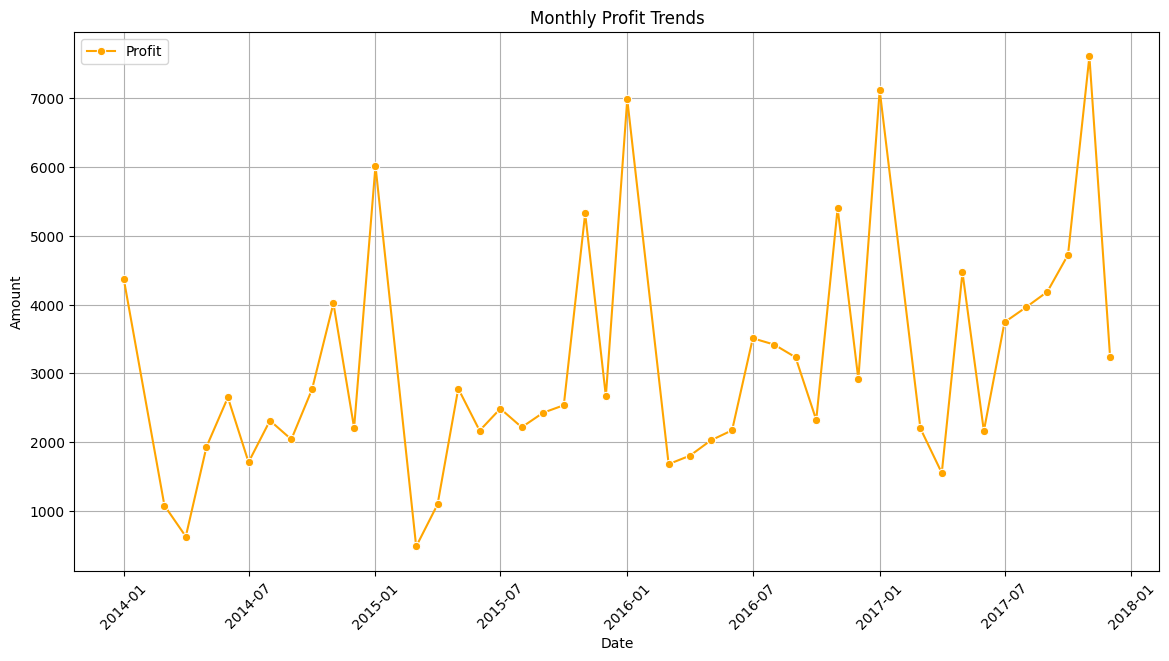

In [51]:
# Line Graph of Monthly Profit Trends
monthly_data = df.groupby(['Order Year', 'Order Month_sin', 'Order Month_cos']).agg({
    'Profit': 'sum',
}).reset_index()

monthly_data['Month'] = (np.arctan2(monthly_data['Order Month_sin'], monthly_data['Order Month_cos']) * (12 / (2 * np.pi)) + 1) % 12 + 1

monthly_data = monthly_data[monthly_data['Month'].between(1, 12)]

monthly_data['Date'] = pd.to_datetime(monthly_data['Order Year'].astype(str) + '-' +
                                       monthly_data['Month'].astype(int).astype(str) + '-01')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Date', y='Profit', label='Profit', marker='o', color='orange')
plt.title('Monthly Profit Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

The line graph depicting "Monthly Profit Trends" from January 2014 to January 2018 reveals several significant patterns in profit fluctuations over time. Initially, profits show a downward trend in early 2014, reaching a low point around mid-2014 before gradually increasing. A notable spike occurs in mid-2015, where profits peak at over 6,000, indicating a strong performance during that period. Following this peak, profits experience a decline, with several fluctuations throughout 2016, suggesting instability in revenue generation. High profits are notable at the beginning of the year. This pattern indicates a recovery and potential growth in profitability, highlighting the importance of analyzing seasonal trends and market conditions that may influence these fluctuations. Overall, the data suggests that while there are periods of volatility, there is a positive trajectory in profits as the timeline progresses. 

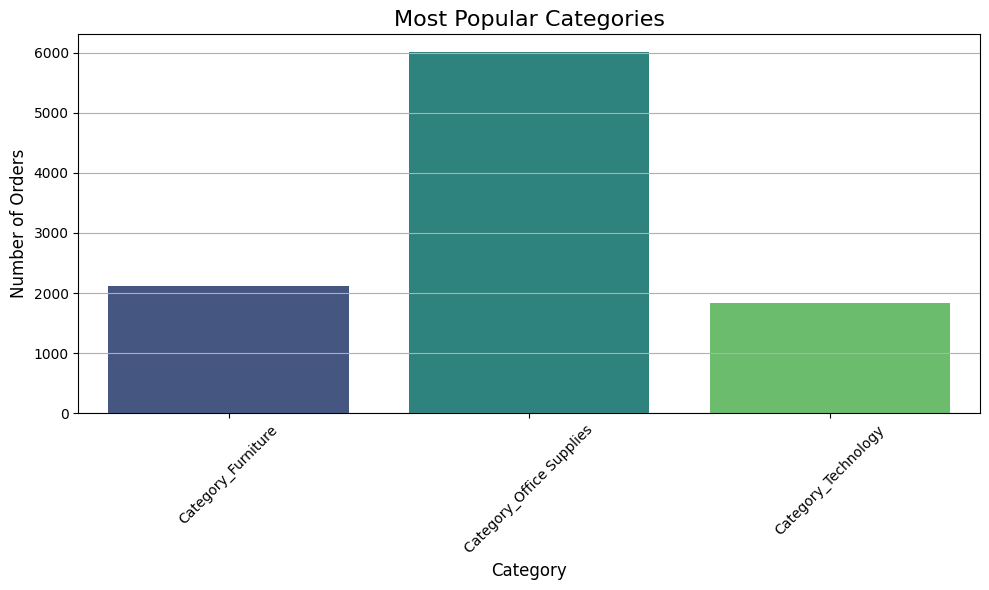

In [52]:
# Bar Chart of Popular Categories
category_counts = df[['Category_Furniture', 'Category_Office Supplies', 'Category_Technology']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.title('Most Popular Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y')

plt.tight_layout()  
plt.show()

The "Most Popular Categories" bar chart shows the order volumes for Furniture, Office Supplies, and Technology. Office Supplies leads with over 6000 orders, Furniture has around 2000, and Technology trails with just above 1000. 

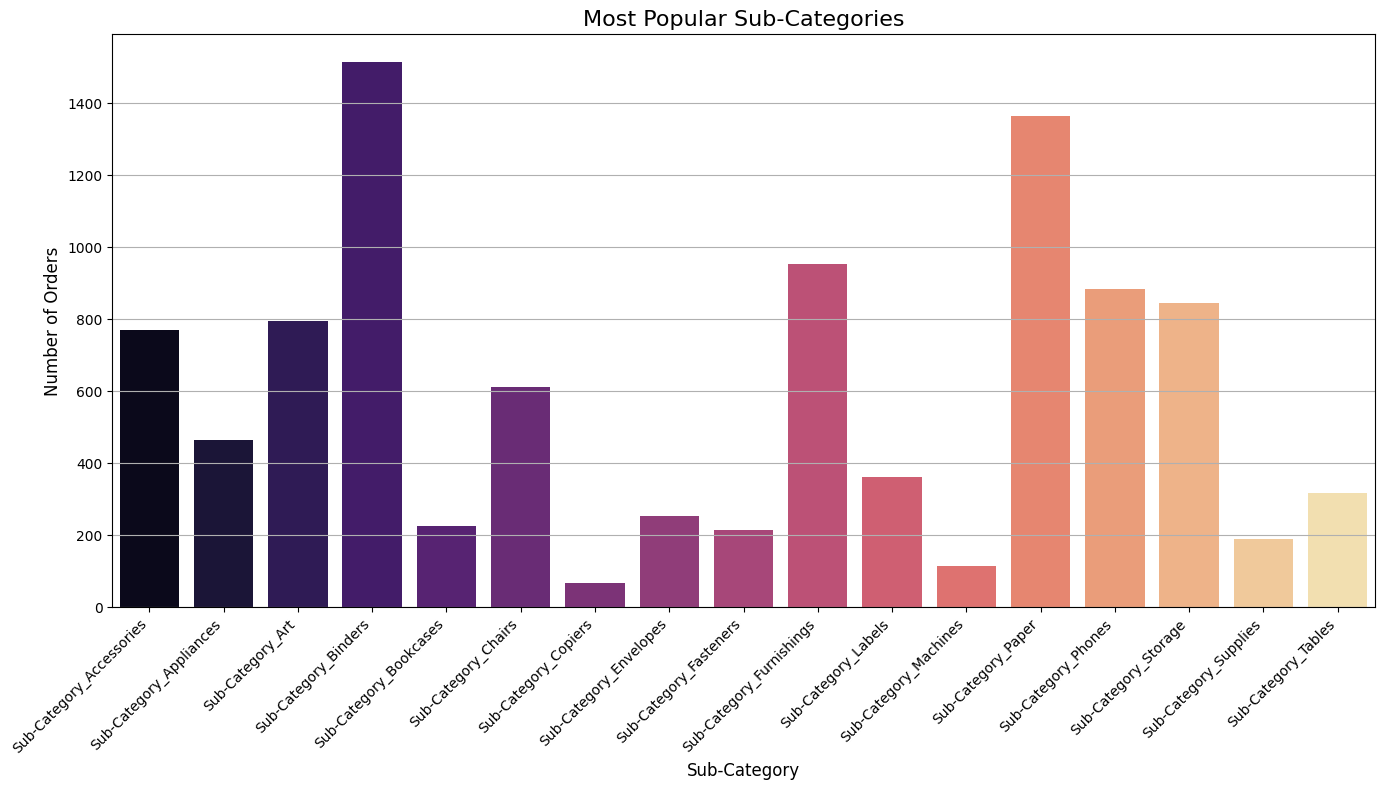

In [53]:
# Bar Chart of Sub-Categories
sub_category_counts = df[['Sub-Category_Accessories', 'Sub-Category_Appliances', 
                          'Sub-Category_Art', 'Sub-Category_Binders', 
                          'Sub-Category_Bookcases', 'Sub-Category_Chairs', 
                          'Sub-Category_Copiers', 'Sub-Category_Envelopes', 
                          'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 
                          'Sub-Category_Labels', 'Sub-Category_Machines', 
                          'Sub-Category_Paper', 'Sub-Category_Phones', 
                          'Sub-Category_Storage', 'Sub-Category_Supplies', 
                          'Sub-Category_Tables']].sum()

plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='magma')

plt.title('Most Popular Sub-Categories', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(ticks=range(len(sub_category_counts)), labels=sub_category_counts.index, rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout() 
plt.show()


The "Most Popular Sub-Categories" bar chart shows the order volumes for various sub-categories. Binder leads with over 1400 orders, making it the most popular. Paper and Furnishings follow with around 1000 and slightly fewer orders, respectively. Accessories, Art, and Chairs have moderate orders over 600, while Appliances,Bookcases and Labels are lower (below 600). Copiers and Machines are the least popular. This chart effectively highlights the popularity differences, with Binders as the top choice.

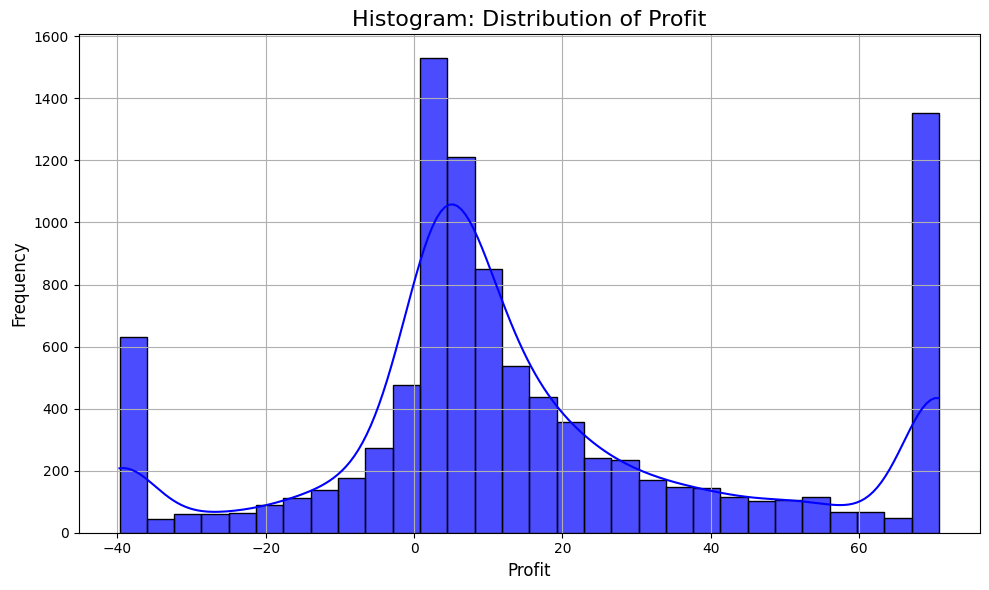

In [54]:
# Histogram of Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram: Distribution of Profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The histogram shows profit distribution, ranging from -40 to 70, with frequency up to 1500.There is a peak around 0 to 10 indicating higher occurrences. Negative profits appear from -40 to 0, but less frequent. The bimodal shape (peaks around 0 and 60) suggests higher profits. 

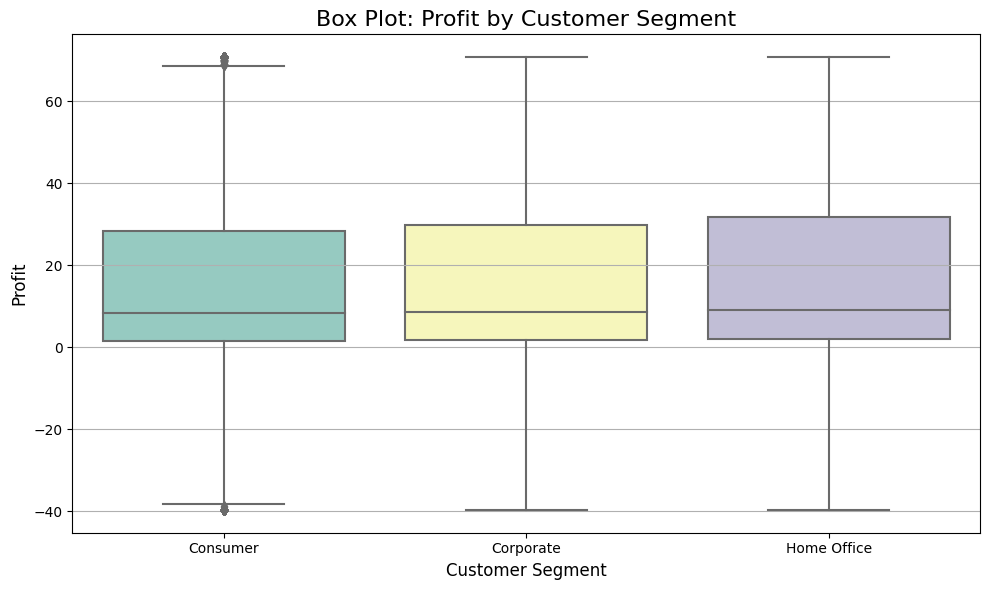

In [55]:
# Box Plot for Profit by Segment
df_segments = df[['Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']].idxmax(axis=1).map({
    'Segment_Consumer': 'Consumer',
    'Segment_Corporate': 'Corporate',
    'Segment_Home Office': 'Home Office'
})

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_segments, y=df['Profit'], palette='Set3')
plt.title('Box Plot: Profit by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The box plot shows profit distribution across Consumer, Corporate, and Home Office segments. All 3 segments have same variability and standardized median profit above zero. 

# **Model Building**

**Model Training**

In [56]:
# Features (X) and Target (y)
X = df.drop(['Profit'], axis=1)  
y = df['Profit'] 

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The dataset is first split into features (X) and target (y), with ‘Profit’ as the target. Then, it is divided into training (70%) and test (30%) sets to evaluate model performance on unseen data.

**Model Selection**

For predicting profit, I selected four models to ensure a comprehensive evaluation across different techniques. Each model offers unique strengths, providing insights into their suitability for this regression problem:

* Linear Regression (LR): A simple, interpretable model that works well with linear relationships. Although it may not capture complex patterns, it serves as a baseline for comparison. Useful to see how much variance in profit can be explained by a straightforward linear relationship with features.

* Support Vector Regression (SVR): SVR can handle non-linear relationships by transforming data using kernels. It performs well on small datasets and minimizes errors within a defined margin. Chosen to test whether SVR can outperform linear regression by capturing non-linear patterns in the dataset.

* Gradient Boosting Regressor (GBR): GBR builds an ensemble of weak learners (decision trees) to improve accuracy iteratively. It is known for handling outliers and achieving high performance. This model can capture subtle interactions between features, making it a strong candidate for profit prediction.

* Random Forest Regressor (RF): An ensemble model that reduces overfitting by using bootstrapped samples and random feature selection. It performs well on datasets with complex interactions and non-linear patterns. RF is expected to provide high accuracy and robust predictions, given the size and complexity of the dataset.


***Linear Regression***

inear Regression is a simple, interpretable model that assumes a linear relationship between input features and the target variable. Although limited in capturing complex patterns, it serves as a baseline model to compare with other advanced algorithms.

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

In [58]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")

Mean Absolute Error (MAE): 13.18


On average, the model's predictions differ from the actual profit values by 13.18 units. MAE provides an intuitive sense of the average magnitude of the errors, but it does not penalize large errors as much as other metrics like MSE.


In [59]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")

Mean Squared Error (MSE): 311.87


The average squared difference between the predicted and actual profits is 311.87. Since the error is squared, larger errors have more influence on this metric, which can highlight how well the model deals with large deviations. This higher value indicates the presence of some larger deviations in the predictions, as squaring the errors amplifies the impact of outliers

In [60]:
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

Root Mean Squared Error (RMSE): 17.66


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The RMSE value of 17.66 represents the average magnitude of prediction errors in the original units of "Profit". This metric is more sensitive to large errors due to the squared term in MSE. The lower the RMSE, the better the model's fit, though 17.66 suggests there may still be room for improvement.


In [61]:
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (R²): {r2_lr:.2f}")

R-squared (R²): 0.64


The R² value of 0.64 means that 64% of the variance in the profit can be explained by the independent variables in the model. The linear regression model performs moderately well, explaining 64% of the variance in the profit, but there is room for improvement.
High MAE and RMSE values indicate that some predictions are relatively far off from the actual values.

Linear Regression explained 64% of the variance in profit, though the relatively high RMSE (17.66) indicates significant prediction errors. This suggests that LR model provides a baseline for comparison but lacks the flexibility to handle non-linear patterns effectively.

***Support Vector Regression (SVR)***

SVR can capture non-linear relationships using kernel functions, making it useful for datasets where a simple linear approach is insufficient. 

In [62]:
svr_model = SVR(kernel='rbf') 

svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

In [63]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

Mean Absolute Error (MAE): 21.32


On average, the predictions differ from the actual profit values by 21.32 units. Compared to the Linear Regression model's MAE of 13.18, the SVR model performs worse, with higher prediction errors on average.

In [64]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")

Mean Squared Error (MSE): 908.72


The average squared error between predictions and actual values is 908.72. This value is considerably higher than the Linear Regression model's MSE (311.87), suggesting that the SVR model struggles to fit the data properly, likely due to large errors in some predictions.

In [65]:
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")

Root Mean Squared Error (RMSE): 30.15


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The RMSE value of 30.15 indicates that the average prediction error, in original units, is quite high. A higher RMSE compared to 17.66 from the linear model suggests that SVR is not well-suited for the data as it produces larger deviations.


In [66]:
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R-squared (R²): {r2_svr:.2f}")

R-squared (R²): -0.04


An R² value of -0.04 indicates that the model performs worse than a simple mean-based prediction. A negative R² means the SVR model fails to explain the variance in the data and may not be appropriate for this problem.


SVR offers flexibility but performs less effectively than ensemble methods for this dataset, highlighting the need for models that handle non-linear interactions more efficiently. SVR performed poorly, with a negative R² (-0.04), indicating it failed to explain the variance in the data. The high RMSE (30.15) confirms that SVR is not well-suited for this problem, producing larger errors than other models.

***Gradient Boosting Regression***

GBR is a powerful ensemble model that builds sequential trees, minimizing errors in each iteration. It performs well with non-linear data and outliers but can be prone to overfitting without careful tuning.

In [67]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

In [68]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")

Mean Absolute Error (MAE): 1.92


On average, the predictions deviate from the actual profit values by only 1.92 units. This low MAE indicates that the model makes very accurate predictions, outperforming both the Linear Regression (MAE: 13.18) and SVR (MAE: 21.32) models

In [69]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")

Mean Squared Error (MSE): 9.91


The average squared difference between the predicted and actual profit values is 9.91. This very low MSE shows that most predictions are very close to the true values, and the model has effectively minimized large errors.

In [70]:
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")

Root Mean Squared Error (RMSE): 3.15


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


On average, the predictions differ from the actual profit values by 3.15 units. The RMSE is significantly lower compared to the Linear Regression (17.66) and SVR (30.15) models, indicating that the Gradient Boosting model handles the data much better.

In [71]:
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared (R²): {r2_gb:.2f}")

R-squared (R²): 0.99


An R² value of 0.99 means that 99% of the variance in the target variable (profit) is explained by the model. This near-perfect R² indicates that the Gradient Boosting Regressor captures the relationships in the data very well, far surpassing the Linear Regression (R²: 0.64) and SVR (R²: -0.04) models.


GBR delivers strong results, with high R² and low errors, demonstrating its ability to capture complex patterns. Gradient Boosting performed exceptionally well, explaining 99% of the variance. Its low RMSE (3.15) suggests high accuracy, though it is still slightly outperformed by Random Forest.

***Random Forest Regression***

RF is an ensemble model that reduces overfitting by using multiple decision trees trained on random subsets of data. It can capture non-linear patterns and interactions effectively, making it an ideal choice for predicting profit.

In [72]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [73]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Mean Absolute Error (MAE): 0.57


On average, the model's predictions deviate from the actual profit values by only 0.57 units. This is a very low MAE, indicating extremely accurate predictions. It outperforms both the Gradient Boosting Regressor (MAE: 1.92) and other models.

In [74]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")

Mean Squared Error (MSE): 1.51


The average squared difference between predicted and actual profit values is 1.51. This low MSE confirms that the model handles both small and large errors very well, significantly reducing deviations.


In [75]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

Root Mean Squared Error (RMSE): 1.23


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The RMSE value of 1.23 means that, on average, predictions deviate by 1.23 units in the original scale of the target variable. This low RMSE shows that the Random Forest Regressor performs even better than the Gradient Boosting Regressor (RMSE: 3.15) in predicting profit.

In [76]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (R²): {r2_rf:.2f}")

R-squared (R²): 1.00


An R² value of 1.00 means that the model explains 100% of the variance in the target variable (profit). This perfect score suggests that the Random Forest model captures the relationships in the data exceptionally well.

With perfect R², RF explains all variance in the target variable, making it the best-performing model. The low MAE and RMSE indicate highly accurate predictions, outperforming other models. Random Forest achieved near-perfect performance, with an R² of 1.00. Its RMSE of 1.23 indicates highly accurate predictions, making it the best model for this dataset.

***Comparison of Evaluation Metrics***

In [77]:
metrics = {
    "Model": [],
    "R²": [],
    "RMSE": [],
    "MSE": [],
    "MAE": []
}

metrics["Model"].append("Random Forest")
metrics["R²"].append(r2_rf)
metrics["RMSE"].append(rmse_rf)
metrics["MSE"].append(mse_rf)
metrics["MAE"].append(mae_rf)

metrics["Model"].append("Gradient Boosting")
metrics["R²"].append(r2_gb)
metrics["RMSE"].append(rmse_gb)
metrics["MSE"].append(mse_gb)
metrics["MAE"].append(mae_gb)

metrics["Model"].append("Support Vector Regression")
metrics["R²"].append(r2_svr)
metrics["RMSE"].append(rmse_svr)
metrics["MSE"].append(mse_svr)
metrics["MAE"].append(mae_svr)

metrics["Model"].append("Linear Regression")
metrics["R²"].append(r2_lr)
metrics["RMSE"].append(rmse_lr)
metrics["MSE"].append(mse_lr)
metrics["MAE"].append(mae_lr)

results_df = pd.DataFrame(metrics)

print(results_df)

                       Model        R²       RMSE         MSE        MAE
0              Random Forest  0.998266   1.230733    1.514704   0.571122
1          Gradient Boosting  0.988664   3.147230    9.905059   1.919112
2  Support Vector Regression -0.039999  30.145004  908.721292  21.320292
3          Linear Regression  0.643071  17.659967  311.874446  13.181460


The model comparison reveals significant differences in performance among the four models evaluated. The Random Forest Regressor stands out as the best-performing model, achieving an R² of 0.998 and an exceptionally low RMSE (1.23), MSE (1.51), and MAE (0.57). This indicates that the Random Forest model explains almost all the variance in the data and makes highly accurate predictions, with minimal deviation from the actual profit values.

The Gradient Boosting Regressor also performs well, with an R² of 0.989 and an RMSE of 3.15, though it is slightly less accurate than the Random Forest model. Its MAE (1.92) suggests that it makes relatively precise predictions, but not as consistent as those of the Random Forest model.

On the other hand, the Support Vector Regression (SVR) model performs poorly, with an R² of -0.04, indicating that it fails to explain the variance in the data. Its high RMSE (30.15), MSE (908.72), and MAE (21.32) confirm that it struggles to provide meaningful predictions, performing worse than simply predicting the mean profit.

The Linear Regression model shows moderate performance, achieving an R² of 0.643. While it explains a reasonable portion of the variance, its RMSE (17.66) and MAE (13.18) suggest that the predictions are less accurate compared to the ensemble models. In summary, Random Forest and Gradient Boosting are the most suitable models for profit prediction, with Random Forest offering the highest accuracy and lowest error metrics.

# **Model Optimization**

***Selecting Models for Tuning***

When deciding which models to tune,
1. Random Forest has an excellent performance with R² = 0.9983.
This is decided to tune as even the performance is already very high, fine-tuning might help achieve even better generalization or slightly better results.

2. Gradient Boosting has an excellent performance with R² = 0.9887, but lower than Random Forest.
This is decided to tune as even the performance is already very high, Gradient Boosting can benefit significantly from hyperparameter tuning and given its potential, tuning could bring it closer to Random Forest performance or even outperform it.


4. Support Vector Regression (SVR) has a very poor performance with R² = -0.0400.
This is decided not to tune as it's unlikely that hyperparameter tuning alone will significantly improve the SVR model.

5. Linear Regression has a moderate performance with R² = 0.6431.
This is decided not to tune as Linear Regression has few hyperparameters, and further tuning is unlikely to yield significant improvements.

In conclusion, models selected for hyperparameter tuning are Gradient Boosting Regressor (GBR) and Random Forest Regressor (RF). These ensemble models have complex architectures that can benefit significantly from hyperparameter optimization. In contrast, Linear Regression (LR) has limited hyperparameters, and Support Vector Regression (SVR) showed poor performance, making further tuning unnecessary.
Random Forest Regressor already performed exceptionally well with an R² of 1.00 and tuning will ensure better generalization and verify that no overfitting occurs.
Although Gradient Boosting Regressor  achieved a high R² of 0.99, further tuning may improve its performance to match or surpass RF.


***Hyperparameter Tuning Process***

I used RandomizedSearchCV for RF and GBR to efficiently search across a range of hyperparameters. This method samples a subset of the parameter space randomly, making it faster than GridSearchCV. Additionally, 5-fold cross-validation ensures the model’s robustness by splitting the dataset into five parts, using four for training and one for validation, repeated across all folds.

***Random Forest Regressor Tuning***

The following hyperparameters were optimized for the Random Forest Regressor to improve the model’s performance and generalization ability,
* n_estimators: Number of trees in the forest. More trees generally increase accuracy but also computation time.
* max_depth: ontrols the maximum depth of each decision tree, balancing underfitting and overfitting.
* min_samples_split: Minimum samples required to split an internal node, controlling tree growth.
* min_samples_leaf: Minimum samples required to be at a leaf node, helping prevent overfitting.
* max_features: Number of features to consider when making splits, influencing diversity among trees.


*Hyperparameter Tuning*

In [78]:
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Random Search with 5-fold cross-validation
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=rf_params, 
    n_iter=10, cv=5, verbose=2, n_jobs=-1, scoring='r2'
)

# Fitingt the model
random_search_rf.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


The best parameters identified during the tuning process are:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
These parameters strike a balance between model complexity and generalization, leading to more accurate and stable predictions.

*Cross-Validation*

In [79]:
best_rf = random_search_rf.best_estimator_

# 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.93105093 0.93675901 0.93354652 0.94231806 0.93829096]
Mean R² Score: 0.9363930963348732


The scores across the 5 folds are high and consistent, ranging from 0.9310 to 0.9421, indicating that the model performs robustly across different data splits.
On average, the tuned Random Forest model explains 93.63% of the variance in the profit variable across validation folds, showing reliable generalization.


*Evaluation of the Tuned Model on the Test Set*

In [85]:
print(f"Best R² Score: {random_search_rf.best_score_:.4f}")
rf_best = random_search_rf.best_estimator_
y_pred_rf_tuned = rf_best.predict(X_test)
# Evaluation of the tuned model
print(f"Tuned Random Forest R²: {r2_score(y_test, y_pred_rf_tuned):.4f}")

mae_rf = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)

print(f"Tuned RF MAE: {mae_rf:.2f}")
print(f"Tuned RF MSE: {mse_rf:.2f}")
print(f"Tuned RF RMSE: {rmse_rf:.2f}")

Best R² Score: 0.9257
Tuned Random Forest R²: 0.9407
Tuned RF MAE: 5.06
Tuned RF MSE: 51.85
Tuned RF RMSE: 7.20


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* Best R² Score (Validation Data): 0.9257
  
This reflects the best R² score achieved on the validation data during 5-fold cross-validation. It indicates that the model explains 92.57% of the variance in profit for different validation folds.

* Tuned Random Forest R² (Test Set): 0.9407
  
On the test set, the final tuned model achieved R² = 0.9407, meaning it explains 94.07% of the variance in the target variable (profit). This is a strong result, showing that the model has good predictive power and generalizes well to new, unseen data.

* Tuned RF MAE: 5.06
  
On average, the model's predictions deviate from the actual profit values by 5.06 units. MAE provides a simple and intuitive measure of error, indicating that predictions are highly accurate since the errors are relatively small.

* Tuned RF MSE: 51.85
  
MSE measures the average squared difference between the predicted and actual profit values. A value of 51.85 suggests that the model performs well, with most prediction errors being small.

* Tuned RF RMSE: 7.20
  
RMSE is the square root of MSE, providing a measure of error in the same units as the target variable (profit). A low RMSE (7.20) indicates that the model makes accurate predictions and limits large deviations from actual values.

The R² improved from 0.9257 (validation) to 0.9407 (test set), showing that the model performs consistently across different data splits and generalizes well to unseen data.

The low MAE of 5.06 and RMSE of 7.20 confirm that the model's predictions are close to the actual values, with minimal large errors.

The initial Random Forest model (Before Hyperparameter Tuning) achieved an R² of 99.82%, which indicates that the model fit the training data extremely well. However, such a high score may indicate overfitting, where the model performs well on training data but poorly on new, unseen data.

After Hyperparameter Tuning, with optimized hyperparameters, the R² score slightly reduced to 94.07% on the test set. While this may seem like a decline, it is actually a positive outcome because, the model now generalizes better to unseen data, reducing the risk of overfitting, the tuned parameters prevent the model from learning noise or irrelevant patterns from the training data and cross-validation scores are now consistent, reflecting the model's stability across multiple data splits.

The tuned Random Forest Regressor is a highly effective model for predicting profit, providing accurate predictions with strong generalization performance. The combination of low error metrics and high R² demonstrates the success of the tuning process.


***Gradient Boosting Regressor Tuning***

The following hyperparameters were tuned for Gradient Boosting Regressor:
* n_estimators: Number of trees in the ensemble.
* learning_rate: Reduces the impact of individual trees, balancing bias and variance.
* max_depth: Maximum depth of each tree, controlling model complexity.
* min_samples_split: Minimum samples required to split an internal node.
* min_samples_leaf: Minimum samples required to be at a leaf node.
* subsample: Fraction of samples used for each tree, preventing overfitting


*Hyperparameter Tuning*

In [81]:
gb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300, 500], 
    'max_depth': [3, 5, 7, 9],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'subsample': [0.7, 0.8, 1.0]  
}

gb_model = GradientBoostingRegressor(random_state=42)

# Random Search with 5-fold cross-validation
random_search_gb = RandomizedSearchCV(
    gb_model, param_distributions=gb_params, n_iter=10,  # Search over 10 random combinations
    cv=5, verbose=2, n_jobs=-1, scoring='r2'
)

# Fitting the model on training data
random_search_gb.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 9, 'learning_rate': 0.05}


The best parameters identified during the tuning process are:
{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 9, 'learning_rate': 0.05}
These parameters provide a balance between model complexity and generalization. A smaller learning rate (0.05) ensures more gradual improvements, while limiting the subsample to 0.8 helps prevent overfitting.

*Cross-Validation*

In [82]:
gb_best = random_search_gb.best_estimator_

# 5-fold cross-validation 
cv_scores = cross_val_score(gb_best, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.9994098  0.99875611 0.99937755 0.99952937 0.998929  ]
Mean R² Score: 0.9992003667090643


The consistent cross-validation scores show that the model performs robustly across multiple data splits, with the model explaining 99.92% of the variance in the profit variable.


*Evaluation of the Tuned Model on the Test Set*

In [83]:
print(f"Best R² Score: {random_search_gb.best_score_:.4f}")
gb_best = random_search_gb.best_estimator_
y_pred_gb_tuned = gb_best.predict(X_test)

# Evaluation of the tuned model
print(f"Tuned Gradient Boosting Test R²: {r2_score(y_test, y_pred_gb_tuned):.4f}")

mae_gbr = mean_absolute_error(y_test, y_pred_gb_tuned)
mse_gbr = mean_squared_error(y_test, y_pred_gb_tuned)
rmse_gbr = mean_squared_error(y_test, y_pred_gb_tuned, squared=False)

# Print the evaluation metrics
print(f"Tuned GBR MAE: {mae_gbr:.2f}")
print(f"Tuned GBR MSE: {mse_gbr:.2f}")
print(f"Tuned GBR RMSE: {rmse_gbr:.2f}")

Best R² Score: 0.9988
Tuned Gradient Boosting Test R²: 0.9993
Tuned GBR MAE: 0.33
Tuned GBR MSE: 0.57
Tuned GBR RMSE: 0.75


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* Best R² Score (Validation Data): 0.9988

This score reflects the best cross-validated R² achieved during hyperparameter tuning. It shows that the model explains 99.88% of the variance in profit on validation data.

* Tuned Random Forest R² (Test Set): 0.9993

On the test set, the model achieved R² = 0.9993, meaning the model captures almost all variance in the profit variable, providing highly accurate predictions.

* Tuned RF MAE: 0.33

On average, the model’s predictions deviate by 0.32 units from the actual profit, indicating extremely accurate predictions.

* Tuned RF MSE: 0.57

The low MSE confirms that most prediction errors are minimal.

* Tuned RF RMSE: 0.75
  
A low RMSE indicates that large deviations from the actual values are rare.

After tuning, the MAE reduced from 1.92 to 0.33, and RMSE dropped from 3.15 to 0.75, indicating more accurate predictions with fewer errors. The model's R² improved from 0.99 to 0.9993, showing that the tuned model explains almost 100% of the variance in the profit variable.

The Improvement Occurred as the optimized parameters such as reduced learning rate and better subsampling allowed the model to avoid overfitting while improving performance.

The tuned Gradient Boosting Regressor is highly effective, achieving near-perfect performance on the test set with R² = 0.9993 and minimal error metrics. The combination of low MAE (0.33), RMSE (0.75), and robust cross-validation scores confirms the success of the tuning process. The optimized model is ideal for predicting profit accurately and reliably.


***Feature Importance***

In [84]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

feature_importance = gbr.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                       Feature  Importance
16  Total Price After Discount    0.494387
4                Profit Margin    0.449961
0                        Sales    0.051014
2                     Discount    0.004093
92          Sub-Category_Paper    0.000131
93         Sub-Category_Phones    0.000077
78    Category_Office Supplies    0.000058
85         Sub-Category_Chairs    0.000056
86        Sub-Category_Copiers    0.000054
77          Category_Furniture    0.000053


1. Total Price After Discount (0.494)
This is the most influential feature, accounting for nearly 50% of the model's prediction power.

The overall price after applying discounts has the strongest impact on profitability. This suggests that how effectively discounts are managed directly influences profit. Focus on optimizing discounts without eroding margins by setting discount limits or introducing conditional promotions.

2. Profit Margin (0.450)

This feature closely follows in importance, contributing about 45% to the model’s predictions.

Profit margin (profit as a percentage of sales) is a strong predictor of future profits, indicating that higher margins consistently lead to greater profitability. Focus on high-margin products (e.g., Technology) and avoid selling products with low or negative margins unless necessary.

3. Sales (0.051)
Sales has a small but noticeable impact on predicting profit.

Although sales are important, high revenue alone does not guarantee profitability. This aligns with the fact that high discounts and other operational costs can negate profit gains. Ensure profitability is considered alongside sales volume by promoting high-margin products or bundling low-margin products with profitable ones.

The model suggests that managing discounts and profit margins more efficiently is key to driving profitability. While sales volume plays a role, it’s not as impactful as the profit margin or total price after discount. Therefore, the company should focus on optimizing pricing strategies and managing discounts effectively, rather than just pursuing high sales. Additionally, product categories and sub-categories have minimal impact, so the business should prioritize individual transaction insights over broad category-based strategies.

# Business Recommendations Based on Best Performing Model

The Gradient Boosting Regressor (GBR) emerged as the best-performing model after hyperparameter tuning, with an R² score of 0.99. This indicates the model effectively captures non-linear relationships between features and profit, offering actionable insights for optimizing the company’s strategy.

1.	Optimize Discount Management and Pricing Strategies
  
o	Total Price After Discount is the most influential feature, showing that managing discounts effectively is essential for profitability.

o	Recommendation:
Use threshold-based discounts (only on bulk purchases) to balance sales growth and profit.
Implement dynamic pricing models to adjust prices in real-time based on demand patterns and customer behavior.

2.	Focus on High-Margin Products and Targeted Campaigns

o	Profit Margin significantly influences profitability, highlighting the importance of promoting high-margin products.

o	Recommendation:
Prioritize the sale of Technology products and bundle them with lower-margin items like Office Supplies to boost overall profit.
Create targeted marketing campaigns aimed at high-spending customer segments, such as corporate clients.

3.	Enhance Sales Efficiency through Product Mix Optimization

o	Sales volume alone is less important than efficient product mixes that maximize profit.

o	Recommendation:
Shift the focus from increasing sales to improving the product mix to drive profitability.
Train sales teams to encourage upselling and cross-selling of profitable product bundles.

4.	Reduce Shipping Costs to Improve Margins
  
o	High operational and shipping costs can result in negative profits, even for high-sales transactions.

o	Recommendation:
Offer free or discounted shipping only on profitable orders or for loyal customers.
Negotiate with logistics partners for better rates and encourage customers to choose standard shipping to cut costs.

5.	Use Predictive Insights for Seasonal and Customer Trends
o	Weekday orders are more frequent, suggesting business customers drive most sales.

o	Recommendation:
Introduce weekend-only promotions to stimulate sales during off-peak times.
Forecast demand trends using model predictions to optimize inventory and ensure stock availability during peak periods.

The GBR model highlights the importance of profit margins, discount management, and targeted sales strategies in driving profitability. By applying these insights, the business can enhance decision-making, streamline operations, and improve profitability. Aligning pricing, promotions, and logistics with these recommendations will result in sustainable growth and operational efficiency.
